In [1]:
#exploratory data analysis (EDA) 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
# Step 1:- Load the dataset

In [4]:
# Load the dataset
import pandas as pd
df = pd.read_csv(r"C:\Users\GURU\Downloads\MLR\MLR\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
df.shape

(1436, 11)

In [6]:
# Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
# Check the first few rows of the dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [8]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [9]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [10]:
# Convert categorical variables into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'],drop_first=True)

In [11]:
# Label encoding for Automatic variable (Yes=1, No=0)
df['Automatic'] = df['Automatic'].map =({'yes':1 , 'no':1})

In [12]:
# Check the updated dataset
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,NaN,2000,3,4,5,1165,1,0
1,13750,23,72937,90,NaN,2000,3,4,5,1165,1,0
2,13950,24,41711,90,NaN,2000,3,4,5,1165,1,0
3,14950,26,48000,90,NaN,2000,3,4,5,1165,1,0
4,13750,30,38500,90,NaN,2000,3,4,5,1170,1,0


In [13]:
df.isnull().sum()

Price                  0
Age_08_04              0
KM                     0
HP                     0
Automatic           1436
cc                     0
Doors                  0
Cylinders              0
Gears                  0
Weight                 0
Fuel_Type_Diesel       0
Fuel_Type_Petrol       0
dtype: int64

In [14]:
# Summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,0.0,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,NaN,1576.85585,4.033426,4.0,5.026462,1072.45961,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,NaN,424.38677,0.952677,0.0,0.188510,52.64112,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,NaN,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,NaN,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,NaN,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,NaN,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,NaN,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000


In [15]:
#Visualizations

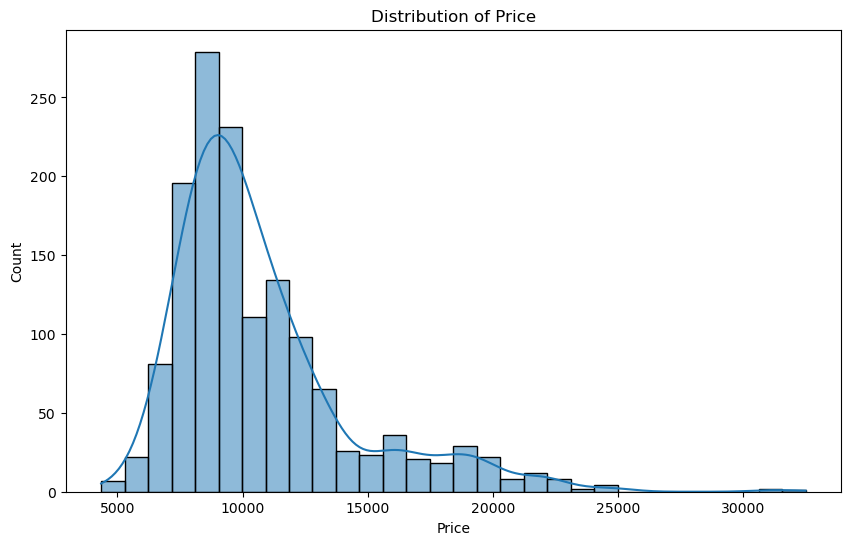

In [16]:
# Visualizing the distribution of Price (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'],kde=True,bins=30)
plt.title("Distribution of Price")
plt.show()

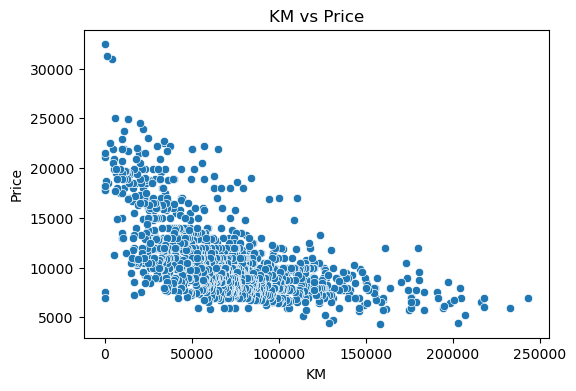

In [17]:
# Scatter plot of KM vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['KM'],y=df['Price'])
plt.title("KM vs Price")
plt.show()

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


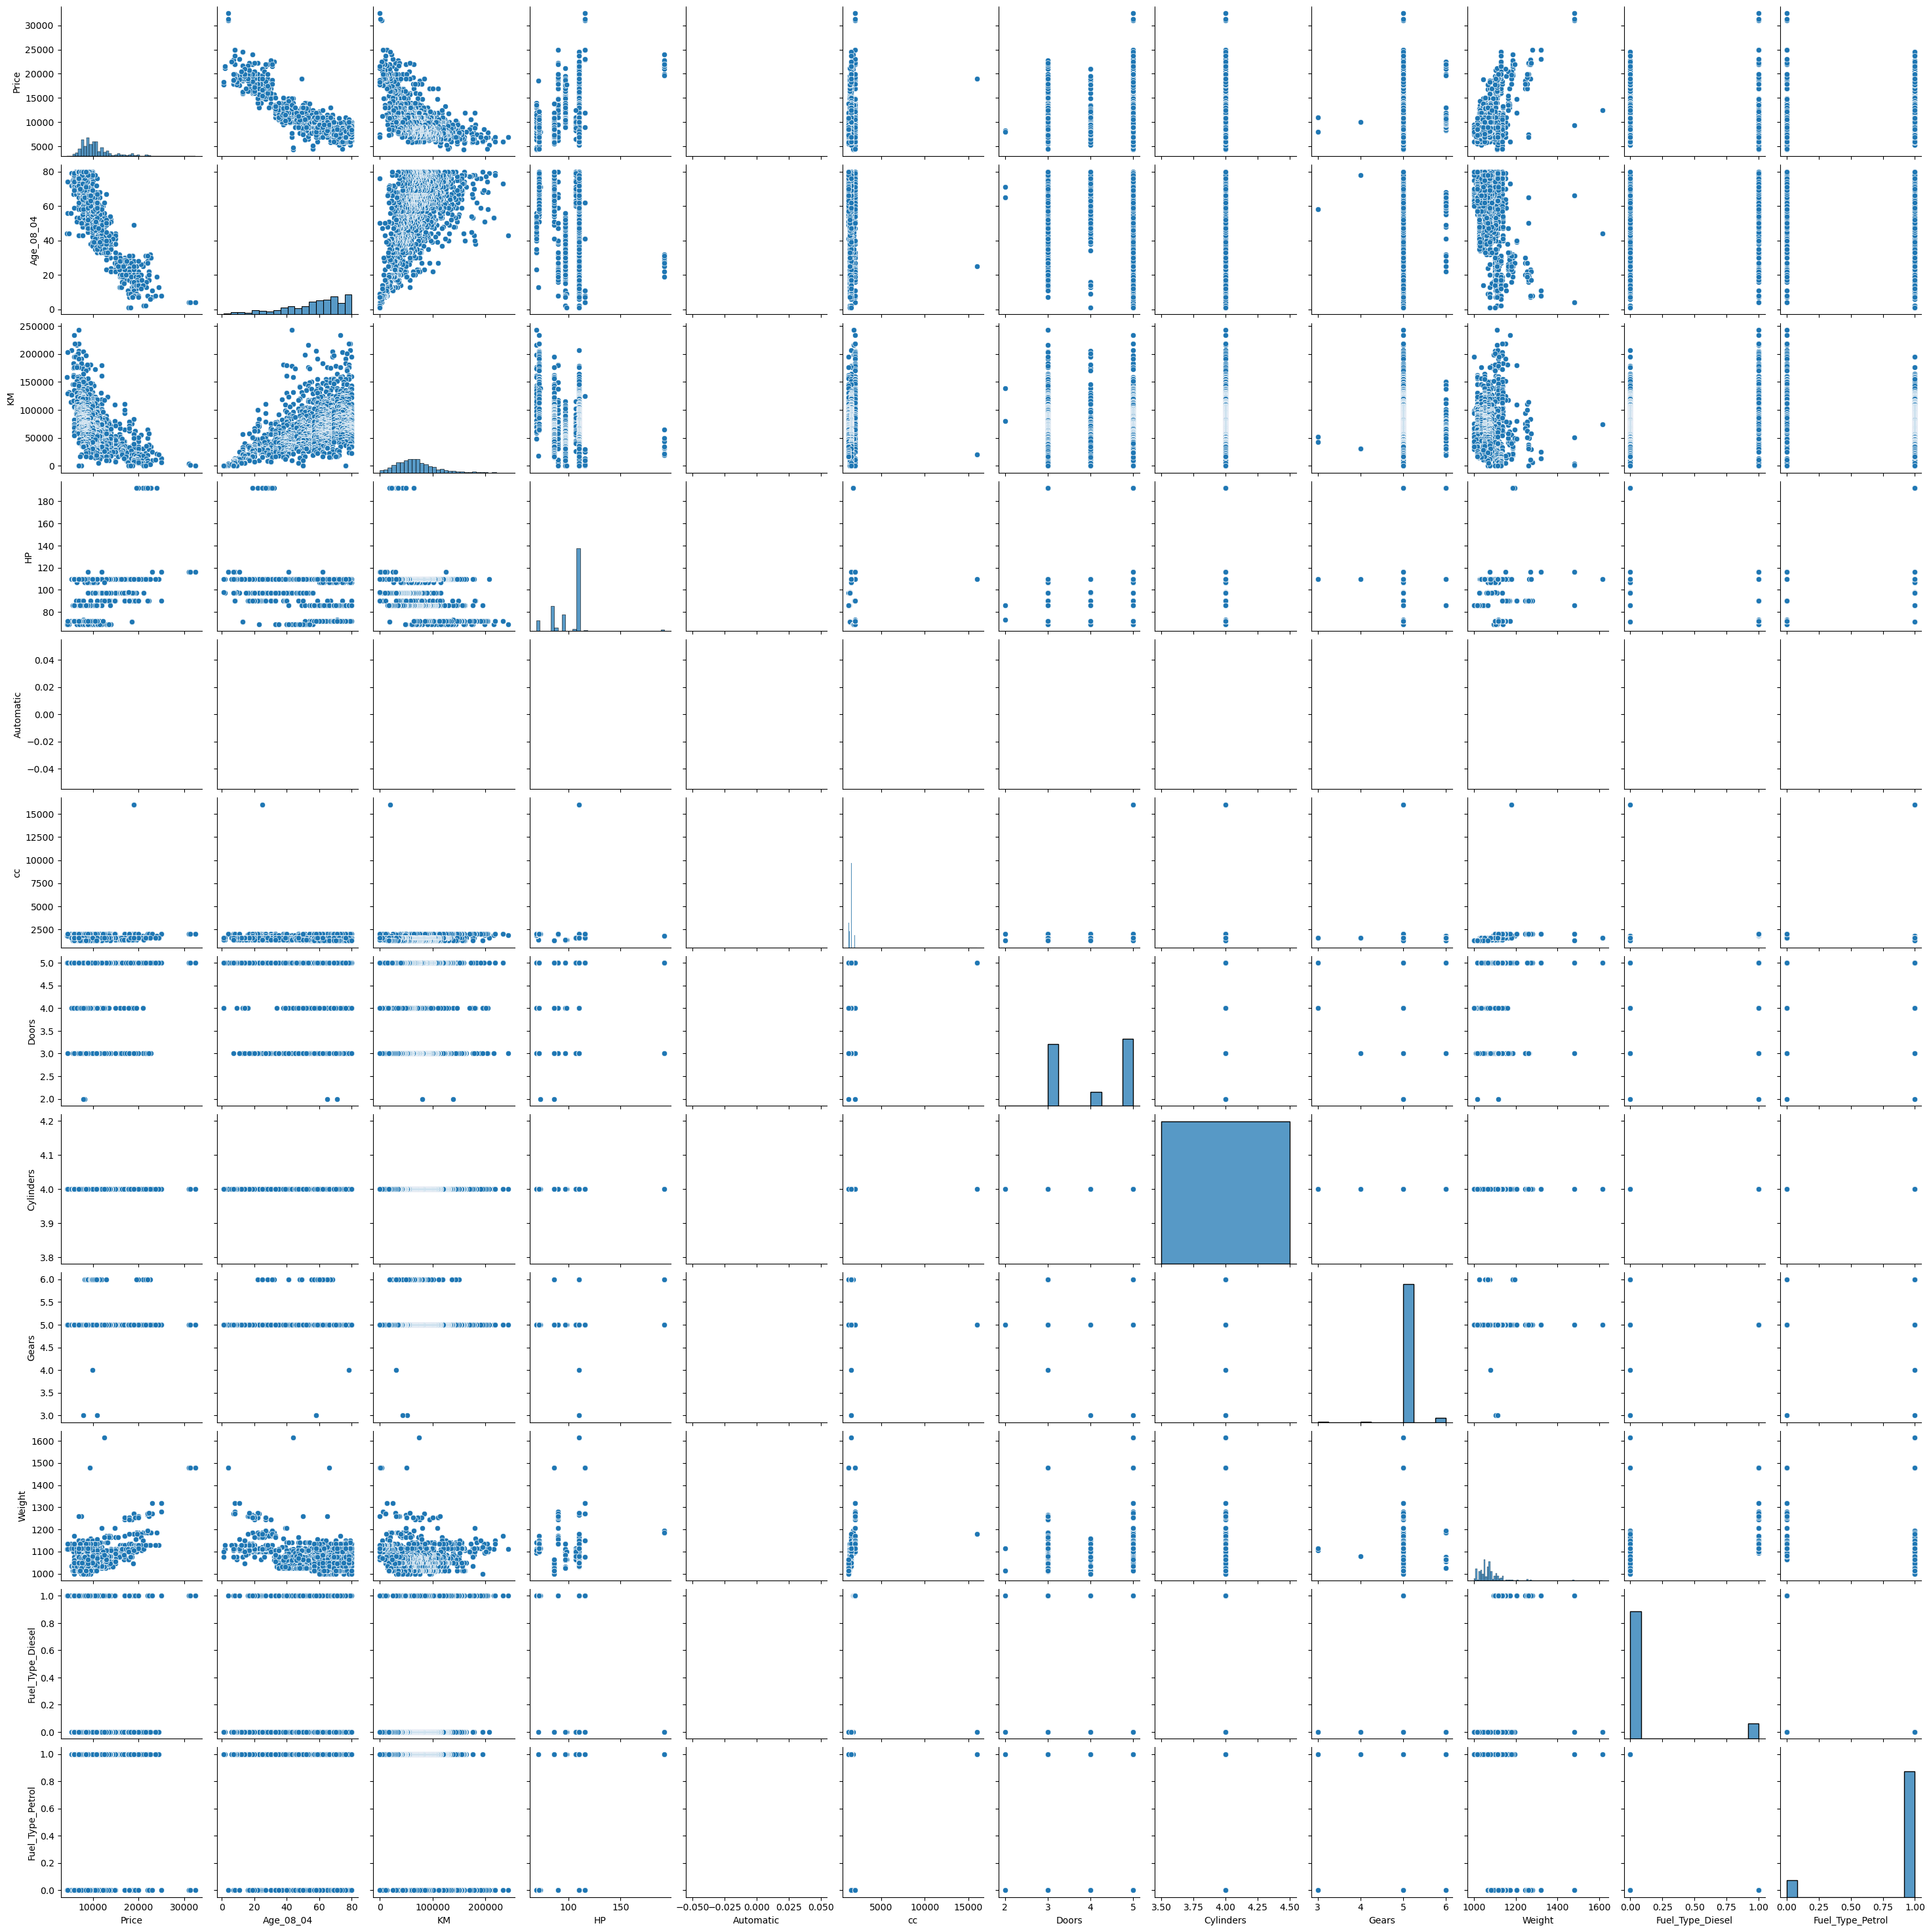

In [18]:
# Scatter plot to visualize relationships between features and target variable (Price)
sns.pairplot(df)
plt.show()

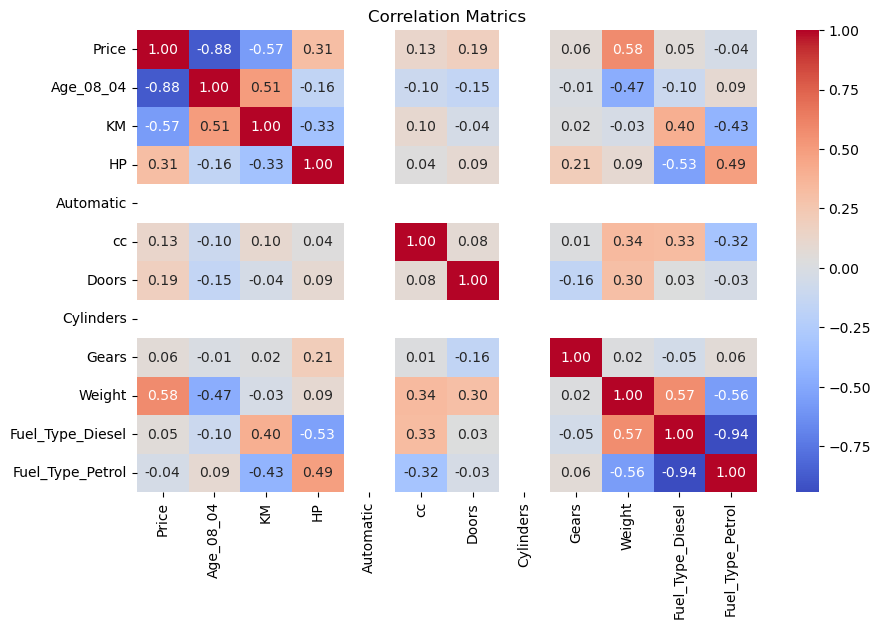

In [19]:
# Correlation heatmap to check for multicollinearity
plt.figure(figsize= (10, 6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrics")
plt.show()

In [20]:
#Step 2:-  Preprocessing Data for MLR

In [21]:
# Separate features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

In [22]:
# Standardize the features (important for Ridge and Lasso regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [23]:
#Step 3:- Split the Data into Training and Testing Sets

In [24]:
# Split the data into training and testing sets (80-20 split)
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size = 0.2,random_state=42)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1148, 11), (288, 11), (1148,), (288,))

In [26]:
#Step 4:- Building 3 MLR Models   
#Model 1: Basic Linear Regression

In [27]:
# Instantiate the model
lr_model = LinearRegression()

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "mean") # Fill NaN with column mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\GURU\anaconda3\New folder\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: [3]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [29]:
# Train the model
lr_model.fit(X_train,y_train)

LinearRegression()

In [30]:
# Predictions
y_pred_lr = lr_model.predict(X_test)

In [31]:
#Model Evaluation 

In [32]:
# Evaluate the model
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_lr = r2_score(y_test,y_pred_lr)

In [33]:
print("Linear Regression MSE :", mse_lr)
print("Linear Regression R2-Squared :", r2_lr)

Linear Regression MSE : 2218506.41818014
Linear Regression R2-Squared : 0.833729931263407


In [34]:
# Apply Lasso and Ridge Regression   
#Model 2: Ridge Regression (with regularization)

In [35]:
# Instantiate the Ridge model (with alpha=1)
ridge_model = Ridge(alpha = 1)

In [36]:
# Train the model
ridge_model.fit(X_train,y_train)

Ridge(alpha=1)

In [37]:
y_pred_ridge = ridge_model.predict(X_test)

In [38]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

In [39]:
print("Linear Regression MSE :",mse_ridge)
print("Linear Regression R2-Squared :",r2_ridge)

Linear Regression MSE : 2216105.6997661456
Linear Regression R2-Squared : 0.8339098575473434


In [40]:
#Model 3: Lasso Regression (with regularization)

In [41]:
# Instantiate the Lasso model (with alpha=0.1)
lasso_model = Lasso(alpha=0.1)

In [42]:
# Train the model
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [43]:
# Predictions
y_pred_lasso = lasso_model.predict(X_test)

In [44]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

In [45]:
print("Linear Regression MSE:",mse_lasso)
print("Linear REgression R2-Squared :", r2_lasso)

Linear Regression MSE: 2218171.008061222
Linear REgression R2-Squared : 0.8337550691954276


In [46]:
#step 5:- Evaluation of Model Performance

In [47]:
# Create a dataframe to compare model performance
comparison = pd.DataFrame({
    'Model':['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE' : [mse_lr,mse_ridge,mse_lasso],
    'R2-Squared' : [r2_lr,r2_ridge,r2_lasso]
})

In [48]:
print(comparison)

               Model           MSE  R2-Squared
0  Linear Regression  2.218506e+06    0.833730
1   Ridge Regression  2.216106e+06    0.833910
2   Lasso Regression  2.218171e+06    0.833755


In [49]:
# step 6:-  Print Evaluation Metrics for all models  
print("Linear Regression MSE :", mse_lr)
print("Linear Regression R2-Squared :", r2_lr)

print("Linear Regression MSE :", mse_ridge)
print("Linear Regression R2-Squared :", r2_ridge)

print("Linear Regression MSE :", mse_lasso)
print("Linear Regression R2-Squared :", r2_lasso)

Linear Regression MSE : 2218506.41818014
Linear Regression R2-Squared : 0.833729931263407
Linear Regression MSE : 2216105.6997661456
Linear Regression R2-Squared : 0.8339098575473434
Linear Regression MSE : 2218171.008061222
Linear Regression R2-Squared : 0.8337550691954276


In [50]:
print("Assumptions and Implications")
print("Assumption 1: We assume that there is a linear relationship between the features and the target variable.")
print("Assumption 2: No significant outliers in the data that would affect the model’s performance.")
print("Assumption 3: The dataset has no missing values after preprocessing.")

Assumptions and Implications
Assumption 1: We assume that there is a linear relationship between the features and the target variable.
Assumption 2: No significant outliers in the data that would affect the model’s performance.
Assumption 3: The dataset has no missing values after preprocessing.


In [51]:
#Interpret Results & Conclusion

print("Conclusion:")
print("- Age, KM, and Weight are significant predictors of Price.")
print("- Linear Regression performed well, but Ridge and Lasso help prevent overfitting.")
print("- Regularization techniques like Ridge and Lasso improve model stability.")

Conclusion:
- Age, KM, and Weight are significant predictors of Price.
- Linear Regression performed well, but Ridge and Lasso help prevent overfitting.
- Regularization techniques like Ridge and Lasso improve model stability.


In [52]:
## Interview Questions:

# 1. What is Normalization & Standardization and how is it helpful?

#Normalization: Rescales the data into a fixed range, typically [0,1] or [-1,1].# Formula :- X′ = X - Xmin / Xmax - Xmin. 
#Standardization: Transforms data to have a mean of 0 and a standard deviation of 1. #Formula:- X′= X - μ / σ . 

#Usefulness  :-
#Improves model performance, especially for algorithms like k-NN, SVM, and Gradient Descent-based models.
#Ensures features with different scales don’t dominate learning.
#Helps achieve faster convergence in optimization algorithms.

In [53]:
# 2. What techniques can be used to address multicollinearity in multiple linear regression?

#Variance Inflation Factor (VIF): Identify high VIF features (VIF > 10 suggests strong multicollinearity) and
             #remove or transform them.
#Principal Component Analysis (PCA): Reduces correlated features into uncorrelated principal components.
#Feature Selection: Drop one of the highly correlated variables.
#Ridge Regression (L2 Regularization): Reduces the impact of collinearity by adding a penalty term.
#Domain Knowledge: Choose the most relevant variable based on business logic.